In [15]:
import pandas as pd
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

Seleccionar les condicions del dataframe genèric que es volen estudiar:

In [16]:
counts= pd.read_csv('C:/Users/NOE/Desktop/TFG-Example/Islet data/DataFrames/SSConditions_DataFrame.csv')

#Possar com a index la columna entre parentesi:
counts= counts.set_index('ensembl')

#Del dataFrame quedar-nos amb les columnes que comencen per ND i IGT:
counts= counts.filter(regex='^(ND|IGT)')
counts

,IGT_counts,IGT_counts.1,IGT_counts.2,IGT_counts.3,IGT_counts.4,IGT_counts.5,IGT_counts.6,IGT_counts.7,IGT_counts.8,IGT_counts.9,...,ND_counts.8,ND_counts.9,ND_counts.10,ND_counts.11,ND_counts.12,ND_counts.13,ND_counts.14,ND_counts.15,ND_counts.16,ND_counts.17
ensembl,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.14,438,118,567,342,183,113,341,377,455,186,...,44,34,28,315,584,704,391,451,622,379
ENSG00000000005.5,0,0,1,7,2,0,0,2,0,0,...,0,0,0,2,0,12,0,0,0,0
ENSG00000000419.12,518,570,892,558,606,686,597,1079,835,565,...,129,165,148,1017,1267,876,900,879,1395,856
ENSG00000000457.13,249,308,285,351,207,314,222,554,320,170,...,70,73,57,433,611,247,427,330,593,228
ENSG00000000460.16,43,32,43,56,56,65,49,80,41,40,...,22,34,5,81,133,59,72,69,83,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000285498.1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
ENSG00000285505.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000285508.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Del DataFrame filtrar les columnes que tinguin tots els valors 0 (no expressió), i dels ensmbl treure decimals:
counts1= counts[counts.sum(axis=1) > 0]

counts1.index = [col.split('.')[0] for col in counts1.index]
counts1

,IGT_counts,IGT_counts.1,IGT_counts.2,IGT_counts.3,IGT_counts.4,IGT_counts.5,IGT_counts.6,IGT_counts.7,IGT_counts.8,IGT_counts.9,...,ND_counts.8,ND_counts.9,ND_counts.10,ND_counts.11,ND_counts.12,ND_counts.13,ND_counts.14,ND_counts.15,ND_counts.16,ND_counts.17
ENSG00000000003,438,118,567,342,183,113,341,377,455,186,...,44,34,28,315,584,704,391,451,622,379
ENSG00000000005,0,0,1,7,2,0,0,2,0,0,...,0,0,0,2,0,12,0,0,0,0
ENSG00000000419,518,570,892,558,606,686,597,1079,835,565,...,129,165,148,1017,1267,876,900,879,1395,856
ENSG00000000457,249,308,285,351,207,314,222,554,320,170,...,70,73,57,433,611,247,427,330,593,228
ENSG00000000460,43,32,43,56,56,65,49,80,41,40,...,22,34,5,81,133,59,72,69,83,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000285483,2,0,0,0,0,0,0,2,0,0,...,0,0,0,2,2,0,1,2,0,0
ENSG00000285486,0,0,0,0,0,0,0,0,1,25,...,0,0,0,0,0,0,0,0,0,0
ENSG00000285492,1,0,4,12,0,0,2,2,0,0,...,1,0,0,3,0,0,3,0,1,0
ENSG00000285498,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [18]:
#Transposar DataFrame:
counts=counts1.T
counts

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000285467,ENSG00000285471,ENSG00000285473,ENSG00000285476,ENSG00000285480,ENSG00000285483,ENSG00000285486,ENSG00000285492,ENSG00000285498,ENSG00000285509
IGT_counts,438,0,518,249,43,2,283,426,324,252,...,1,0,0,18,1,2,0,1,0,5
IGT_counts.1,118,0,570,308,32,2,186,426,471,236,...,0,0,0,14,0,0,0,0,0,0
IGT_counts.2,567,1,892,285,43,63,1287,1011,446,237,...,1,0,0,5,0,0,0,4,0,6
IGT_counts.3,342,7,558,351,56,0,130,516,369,250,...,23,0,0,2,0,0,0,12,0,4
IGT_counts.4,183,2,606,207,56,0,57,525,396,251,...,7,0,0,0,0,0,0,0,0,0
IGT_counts.5,113,0,686,314,65,1,14,722,358,327,...,9,0,0,29,0,0,0,0,0,7
IGT_counts.6,341,0,597,222,49,7,140,509,285,185,...,0,0,0,13,0,0,0,2,0,1
IGT_counts.7,377,2,1079,554,80,11,616,668,316,305,...,2,0,0,27,0,2,0,2,0,2
IGT_counts.8,455,0,835,320,41,6,470,672,495,241,...,6,0,0,91,0,0,1,0,0,5
IGT_counts.9,186,0,565,170,40,0,40,441,222,202,...,7,1,0,2,0,0,25,0,0,0


# Preparar les dades per fer DEG:

Abans d'estudiar els DEG's s'han de preparar i obtenir els components necessaris per fer l'estudi i implementar deseq2: metadata, data frame amb els nivells d'expressió.

In [30]:
#Definir les condicions, marcant el numero de files a les que correspon:
conditions = ['IGT'] * 41 + ['ND'] * 18 

# Crear un dataframe composat per el nom de les mostres i a quina condició patològica té:
metadata = pd.DataFrame(zip(counts.index, conditions), columns=['Sample', 'condition'])

#En el dataframe metadata establir la columna sample com index:
metadata=metadata.set_index('Sample')
metadata

,condition
Sample,
IGT_counts,IGT
IGT_counts.1,IGT
IGT_counts.2,IGT
IGT_counts.3,IGT
IGT_counts.4,IGT
IGT_counts.5,IGT
IGT_counts.6,IGT
IGT_counts.7,IGT
IGT_counts.8,IGT


Creació de l'objecte dds; objecte AnnData que conté informació per calcular el canvi logarítmic (LFC), entre d'altres.

In [20]:
from pydeseq2.dds import DeseqDataSet

# Creació de dds: objecte amb informació informació necessaria per fer DEG.
dds = DeseqDataSet(counts=counts,metadata=metadata,design_factors="condition")
dds

AnnData object with n_obs × n_vars = 59 × 49239
    obs: 'condition'
    obsm: 'design_matrix'

In [21]:
# Ampliació de l'AnnData, amb el càlcul dels valors estadístics (resultats) com: log2FoldChange, Pvalue, Pvalue asj (equival a qvalue)...
dds.deseq2()
dds

Fitting size factors...
... done in 0.17 seconds.

Fitting dispersions...
... done in 8.99 seconds.

Fitting dispersion trend curve...
... done in 1.16 seconds.

Fitting MAP dispersions...
... done in 10.06 seconds.

Fitting LFCs...
... done in 6.48 seconds.

Replacing 1386 outlier genes.

Fitting dispersions...
... done in 0.31 seconds.

Fitting MAP dispersions...
... done in 0.29 seconds.

Fitting LFCs...
... done in 0.25 seconds.



AnnData object with n_obs × n_vars = 59 × 49239
    obs: 'condition'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', 'replaceable'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'replace_cooks'

# Veure si estan les dades normalitzades:

## 1. Boxplot abans de normalitzar:

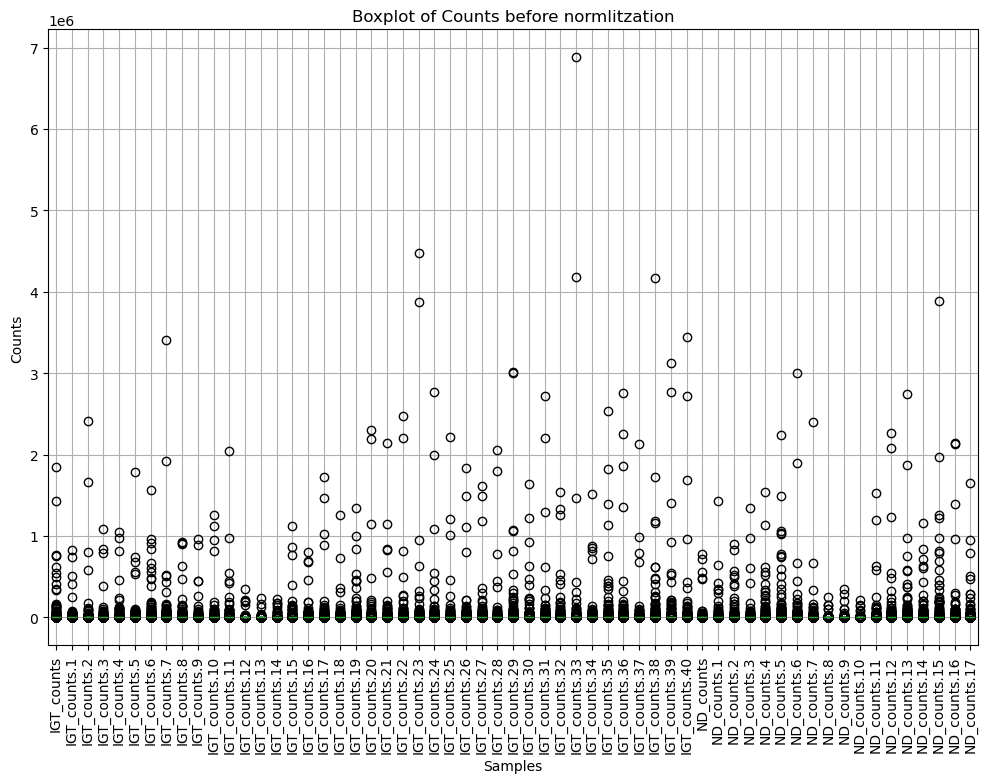

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))  # Ajusta el tamany de la figura

counts1.boxplot()
plt.title('Boxplot of Counts before normlitzation')
plt.xlabel('Samples')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.show()


#### TRANSFORMAR LES DADES PER VISUALITZAR-HO MILLOR: Log2P

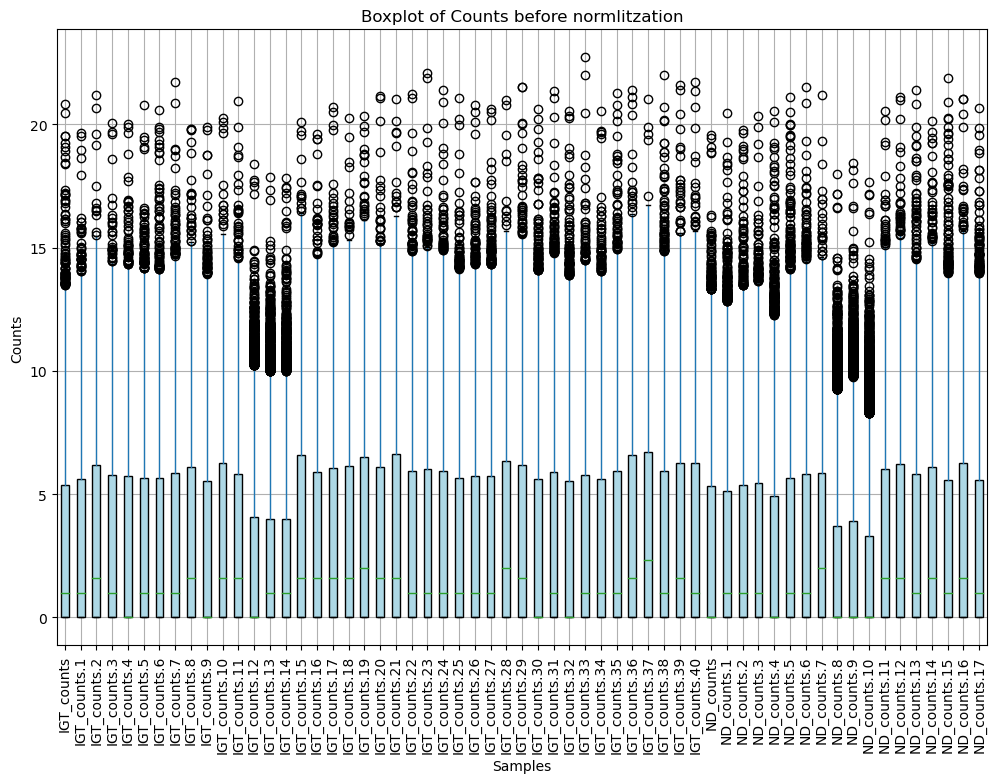

In [10]:
import numpy as np
counts1_t= np.log2(counts1 +1)
counts1_t

plt.figure(figsize=(12, 8))  # Ajusta el tamaño de la figura

counts1_t.boxplot(patch_artist=True, boxprops = dict(facecolor = "lightblue"))
plt.title('Boxplot of Counts before normlitzation')
plt.xlabel('Samples')
plt.ylabel('Counts')

plt.xticks(rotation=90)
plt.show()


#### Reduïr la densitat de mostres per veure millor: 20 mostres

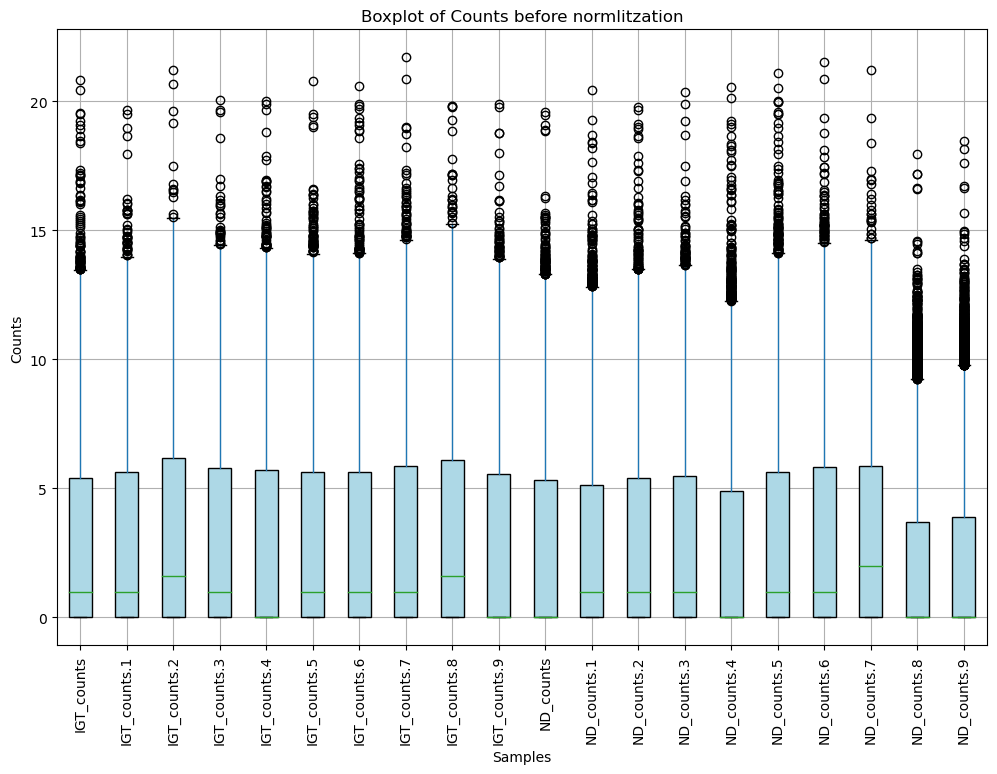

In [11]:
columns_IGT = [col for col in counts1_t.columns if col.startswith('IGT')]
columns_ND = [col for col in counts1_t.columns if col.startswith('ND')]

counts1_t_20 = counts1_t[columns_IGT[:10] + columns_ND[:10]]

plt.figure(figsize=(12, 8))  # Ajusta el tamaño de la figura

bp=counts1_t_20.boxplot(patch_artist=True, boxprops = dict(facecolor = "lightblue"))

plt.title('Boxplot of Counts before normlitzation')
plt.xlabel('Samples')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.show()

## 2. Boxplot després normalitzar:

#### 2.1 Construcció dataframe normalitzat:

In [9]:
normalized_data=dds.layers['normed_counts']
normalized_data


array([[5.64582749e+02, 0.00000000e+00, 6.67702886e+02, ...,
        1.28900171e+00, 0.00000000e+00, 6.44500855e+00],
       [1.21134259e+02, 0.00000000e+00, 5.85140064e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.78684169e+02, 8.44240156e-01, 7.53062220e+02, ...,
        3.37696063e+00, 0.00000000e+00, 5.06544094e+00],
       ...,
       [4.89142515e+02, 0.00000000e+00, 9.53339847e+02, ...,
        0.00000000e+00, 0.00000000e+00, 4.33829282e+00],
       [3.69205853e+02, 0.00000000e+00, 8.28042066e+02, ...,
        5.93578542e-01, 0.00000000e+00, 7.12294250e+00],
       [3.59397780e+02, 0.00000000e+00, 8.11726911e+02, ...,
        0.00000000e+00, 0.00000000e+00, 2.27586984e+01]])

In [10]:
normalized_df = pd.DataFrame(dds.layers['normed_counts'].T, index=dds.var_names, columns=dds.obs_names)
normalized_df


Sample,IGT_counts,IGT_counts.1,IGT_counts.2,IGT_counts.3,IGT_counts.4,IGT_counts.5,IGT_counts.6,IGT_counts.7,IGT_counts.8,IGT_counts.9,...,ND_counts.8,ND_counts.9,ND_counts.10,ND_counts.11,ND_counts.12,ND_counts.13,ND_counts.14,ND_counts.15,ND_counts.16,ND_counts.17
ENSG00000000003,564.582749,121.134259,478.684169,300.073525,164.487782,96.757213,364.524292,298.713371,384.910973,187.509312,...,166.507538,104.635133,137.539222,222.595571,362.611179,694.185536,283.984017,489.142515,369.205853,359.397780
ENSG00000000005,0.000000,0.000000,0.844240,6.141856,1.797681,0.000000,0.000000,1.584686,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.413305,0.000000,11.832708,0.000000,0.000000,0.000000,0.000000
ENSG00000000419,667.702886,585.140064,753.062220,489.593646,544.697245,587.393347,638.184758,854.938268,706.375082,569.584739,...,488.169826,507.788145,726.993030,718.665702,786.692404,863.787684,653.671651,953.339847,828.042066,811.726911
ENSG00000000457,320.961426,316.180947,240.608445,307.970197,186.059950,268.865176,237.314935,438.958110,270.706618,171.379479,...,264.898355,224.657785,279.990559,305.980579,379.375737,243.556573,310.130883,357.909158,351.992075,216.207635
ENSG00000000460,55.427074,32.849969,36.302327,49.134846,50.335059,55.656804,52.380324,63.387453,34.684285,40.324583,...,83.253769,104.635133,24.560575,57.238861,82.580971,58.177481,52.293732,74.835551,49.267019,50.258792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000285483,2.578003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.584686,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.413305,1.241819,0.000000,0.726302,2.169146,0.000000,0.000000
ENSG00000285486,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.845958,25.202865,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000285492,1.289002,0.000000,3.376961,10.528896,0.000000,0.000000,2.137972,1.584686,0.000000,0.000000,...,3.784262,0.000000,0.000000,2.119958,0.000000,0.000000,2.178906,0.000000,0.593579,0.000000
ENSG00000285498,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.784262,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [14]:
#EXPORTAR DATAFRAME:
#import os
#directory = r"C:/Users/NOE/Desktop/TFG-Example/Islets study/Expressió genètica/Normalized dataframes"
#file_path = os.path.join(directory, "normalized_IGT_ND.csv")
#normalized_df.to_csv(file_path)

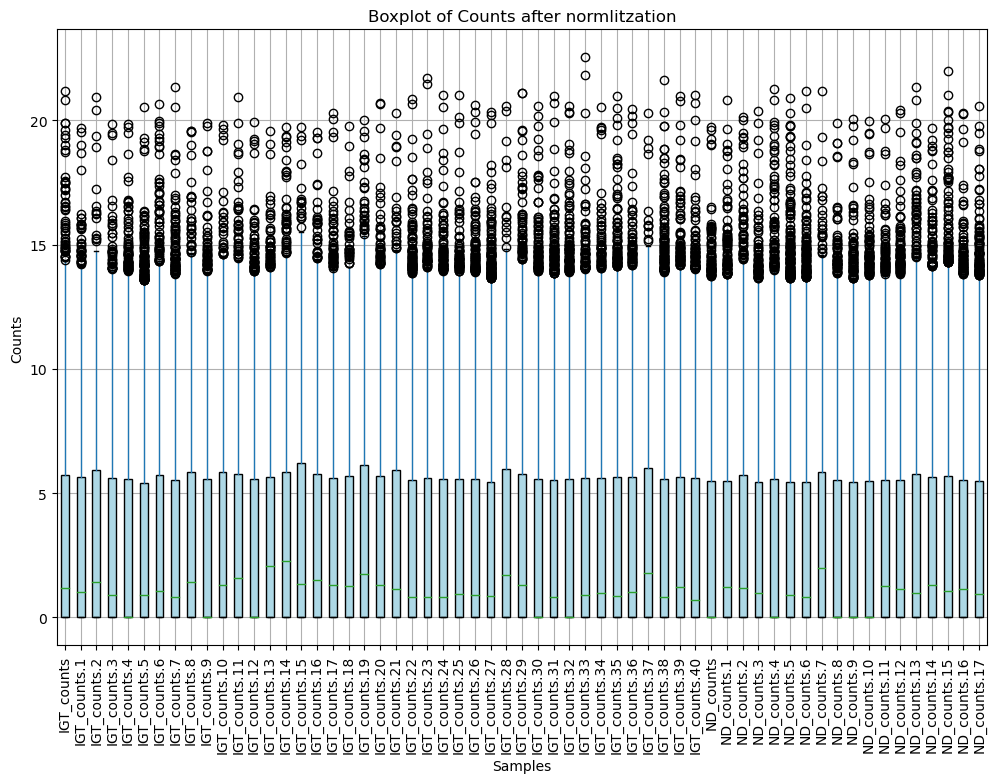

In [16]:
normalized_df_t= np.log2(normalized_df +1)
normalized_df_t

plt.figure(figsize=(12, 8)) 

normalized_df_t.boxplot(patch_artist=True, boxprops = dict(facecolor = "lightblue"))
plt.title('Boxplot of Counts after normlitzation')
plt.xlabel('Samples')
plt.ylabel('Counts')

plt.xticks(rotation=90)
plt.show()

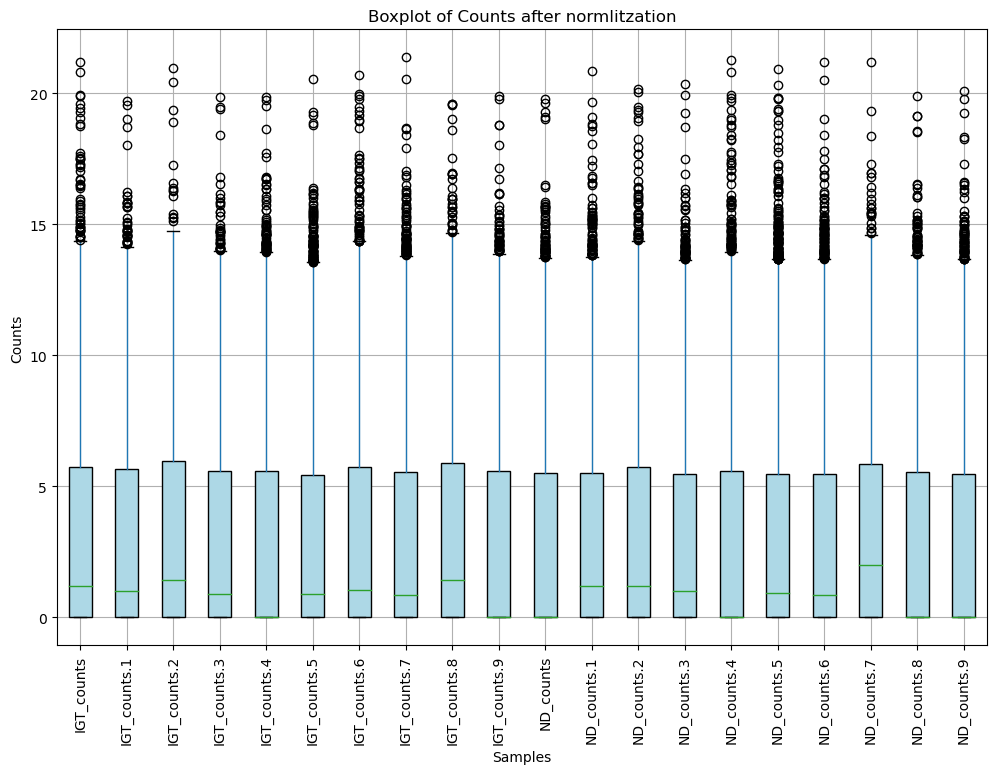

In [14]:
columns_IGT_n = [col for col in normalized_df_t.columns if col.startswith('IGT')]
columns_ND_n = [col for col in normalized_df_t.columns if col.startswith('ND')]

normalized_t_20 = normalized_df_t[columns_IGT_n[:10] + columns_ND_n[:10]]

plt.figure(figsize=(12, 8))  # Ajusta el tamaño de la figura

bp=normalized_t_20.boxplot(patch_artist=True, boxprops = dict(facecolor = "lightblue"))

plt.title('Boxplot of Counts after normlitzation')
plt.xlabel('Samples')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.show()

## DEG study:

In [22]:
from pydeseq2.default_inference import DefaultInference

#Creació de stat_res: objecte que tindrà només els resultats estadístics: log2foldchange...
inference = DefaultInference(n_cpus=8)
stat_res=DeseqStats(dds, inference=inference, contrast=('condition','IGT','ND'))
stat_res.summary()

Running Wald tests...
... done in 3.43 seconds.



Log2 fold change & Wald test p-value: condition IGT vs ND
                   baseMean  log2FoldChange     lfcSE      stat    pvalue  \
ENSG00000000003  375.858358        0.207009  0.191833  1.079108  0.280540   
ENSG00000000005    1.135940        0.609883  1.085685  0.561749  0.574287   
ENSG00000000419  760.691720       -0.018704  0.106511 -0.175606  0.860604   
ENSG00000000457  278.923873       -0.102330  0.088957 -1.150334  0.250006   
ENSG00000000460   59.355734       -0.482489  0.162198 -2.974696  0.002933   
...                     ...             ...       ...       ...       ...   
ENSG00000285483    0.416860       -0.908301  1.201300 -0.756098  0.449590   
ENSG00000285486    0.405219        0.273287  1.231707  0.221876  0.824410   
ENSG00000285492    1.961758       -0.130679  0.776063 -0.168387  0.866279   
ENSG00000285498    0.064140       -0.554218  3.282275 -0.168852  0.865913   
ENSG00000285509    4.401411       -1.140698  0.421924 -2.703561  0.006860   

                 

In [23]:
#Guardar els valors (resultats) de stat_res com a nom de res:
res =stat_res.results_df
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSG00000000003,375.858358,0.207009,0.191833,1.079108,0.280540,0.732487
ENSG00000000005,1.135940,0.609883,1.085685,0.561749,0.574287,NaN
ENSG00000000419,760.691720,-0.018704,0.106511,-0.175606,0.860604,0.973310
ENSG00000000457,278.923873,-0.102330,0.088957,-1.150334,0.250006,0.706371
ENSG00000000460,59.355734,-0.482489,0.162198,-2.974696,0.002933,0.103487
...,...,...,...,...,...,...
ENSG00000285483,0.416860,-0.908301,1.201300,-0.756098,0.449590,NaN
ENSG00000285486,0.405219,0.273287,1.231707,0.221876,0.824410,NaN
ENSG00000285492,1.961758,-0.130679,0.776063,-0.168387,0.866279,NaN
ENSG00000285498,0.064140,-0.554218,3.282275,-0.168852,0.865913,NaN


In [24]:
from sanbomics.tools import id_map

#Mapejar els símbols genètics corresponents a les anotacions ensembl:
mapper = id_map(species='human')
res['Symbol'] = res.index.map(mapper.mapper)
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
ENSG00000000003,375.858358,0.207009,0.191833,1.079108,0.280540,0.732487,TSPAN6
ENSG00000000005,1.135940,0.609883,1.085685,0.561749,0.574287,NaN,TNMD
ENSG00000000419,760.691720,-0.018704,0.106511,-0.175606,0.860604,0.973310,DPM1
ENSG00000000457,278.923873,-0.102330,0.088957,-1.150334,0.250006,0.706371,SCYL3
ENSG00000000460,59.355734,-0.482489,0.162198,-2.974696,0.002933,0.103487,C1orf112
...,...,...,...,...,...,...,...
ENSG00000285483,0.416860,-0.908301,1.201300,-0.756098,0.449590,NaN,AL590381.1
ENSG00000285486,0.405219,0.273287,1.231707,0.221876,0.824410,NaN,AC003043.2
ENSG00000285492,1.961758,-0.130679,0.776063,-0.168387,0.866279,NaN,AL356417.3
ENSG00000285498,0.064140,-0.554218,3.282275,-0.168852,0.865913,NaN,NaN


In [28]:
#Filtrar els gens amb molt poca expressió, 
#per fer-ho ens bassem en Basemean (promitg dels recomptes de lectures normalitzades d'un gen), basemean >=10:

res=res[res.baseMean>= 10]
res


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
ENSG00000000003,375.858358,0.207009,0.191833,1.079108,0.280540,0.732487,TSPAN6
ENSG00000000419,760.691720,-0.018704,0.106511,-0.175606,0.860604,0.973310,DPM1
ENSG00000000457,278.923873,-0.102330,0.088957,-1.150334,0.250006,0.706371,SCYL3
ENSG00000000460,59.355734,-0.482489,0.162198,-2.974696,0.002933,0.103487,C1orf112
ENSG00000000938,16.763865,0.844285,0.445082,1.896921,0.057838,0.409144,FGR
...,...,...,...,...,...,...,...
ENSG00000285410,175.887251,0.117698,0.106849,1.101532,0.270665,0.724040,GABPB1-IT1
ENSG00000285417,10.839996,0.375319,0.398097,0.942783,0.345792,0.782133,NaN
ENSG00000285437,17.103908,-0.006891,0.286204,-0.024078,0.980790,0.998036,POLR2J3
ENSG00000285458,10.714553,0.234254,0.183663,1.275456,0.202148,0.663497,NaN


In [32]:
#Dels resultats identifiquem filtrant els gens diferencialment expressats:
sigs =res[(res.padj < 0.05) & (abs(res.log2FoldChange) > 1)] #dades filtrades per significancia
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
ENSG00000009790,21.289783,1.322173,0.364763,3.624745,0.000289,0.037770,TRAF3IP3
ENSG00000010610,142.482445,1.131338,0.308387,3.668567,0.000244,0.035298,CD4
ENSG00000011028,30.651587,1.490892,0.387431,3.848145,0.000119,0.026934,MRC2
ENSG00000019582,2856.189767,1.213476,0.321722,3.771814,0.000162,0.030880,CD74
ENSG00000026025,1368.682474,1.162328,0.324997,3.576421,0.000348,0.041662,VIM
...,...,...,...,...,...,...,...
ENSG00000240065,143.720659,1.069836,0.281819,3.796179,0.000147,0.028936,PSMB9
ENSG00000247809,41.285796,1.387541,0.337716,4.108599,0.000040,0.021911,NR2F2-AS1
ENSG00000249751,41.082514,1.317929,0.369817,3.563729,0.000366,0.042144,ECSCR
ENSG00000253755,10.029484,3.918390,1.029818,3.804933,0.000142,0.028480,IGHGP


### PCA:

#### PCA amb valors normalitzats:

In [21]:
normalized=normalized_df.T
normalized
import pandas as pd

# Añadir la columna "conditions" basada en el índice
normalized['conditions'] = normalized.index.map(lambda x: 'IGT' if x.startswith('IGT') else 'ND' if x.startswith('ND') else 'Other')
normalized.set_index('conditions', inplace=True)
normalized.index.name = None
normalized

# Añadir la columna "patologia" basada en el índice
normalized['patologia'] = normalized.index.map(lambda x: 'IGT' if x.startswith('IGT') else 'ND' if x.startswith('ND') else 'Other')

# Mover el índice a una nueva columna
normalized.reset_index(inplace=True)

# Cambiar el nombre de la nueva columna a 'patologia' y eliminar la columna anterior
normalized = normalized.rename(columns={'index': 'patologia'}).iloc[:, :-1]

normalized

,patologia,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,...,ENSG00000285467,ENSG00000285471,ENSG00000285473,ENSG00000285476,ENSG00000285480,ENSG00000285483,ENSG00000285486,ENSG00000285492,ENSG00000285498,ENSG00000285509
0,IGT,564.582749,0.000000,667.702886,320.961426,55.427074,2.578003,364.787484,549.114728,417.636554,...,1.289002,0.000000,0.000000,23.202031,1.289002,2.578003,0.000000,1.289002,0.000000,6.445009
1,IGT,121.134259,0.000000,585.140064,316.180947,32.849969,2.053123,190.940442,437.315206,483.510474,...,0.000000,0.000000,0.000000,14.371861,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,IGT,478.684169,0.844240,753.062220,240.608445,36.302327,53.187130,1086.537081,853.526798,376.531110,...,0.844240,0.000000,0.000000,4.221201,0.000000,0.000000,0.000000,3.376961,0.000000,5.065441
3,IGT,300.073525,6.141856,489.593646,307.970197,49.134846,0.000000,114.063036,452.742511,323.763540,...,20.180383,0.000000,0.000000,1.754816,0.000000,0.000000,0.000000,10.528896,0.000000,3.509632
4,IGT,164.487782,1.797681,544.697245,186.059950,50.335059,0.000000,51.233899,471.891178,355.940774,...,6.291882,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,IGT,96.757213,0.000000,587.393347,268.865176,55.656804,0.856259,11.987619,618.218654,306.540551,...,7.706327,0.000000,0.000000,24.831497,0.000000,0.000000,0.000000,0.000000,0.000000,5.993810
6,IGT,364.524292,0.000000,638.184758,237.314935,52.380324,7.482903,149.658067,544.113973,304.661066,...,0.000000,0.000000,0.000000,13.896821,0.000000,0.000000,0.000000,2.137972,0.000000,1.068986
7,IGT,298.713371,1.584686,854.938268,438.958110,63.387453,8.715775,488.083386,529.285230,250.380438,...,1.584686,0.000000,0.000000,21.393265,0.000000,1.584686,0.000000,1.584686,0.000000,1.584686
8,IGT,384.910973,0.000000,706.375082,270.706618,34.684285,5.075749,397.600345,568.483898,418.749300,...,5.075749,0.000000,0.000000,76.982195,0.000000,0.000000,0.845958,0.000000,0.000000,4.229791
9,IGT,187.509312,0.000000,569.584739,171.379479,40.324583,0.000000,40.324583,444.578531,223.801437,...,7.056802,1.008115,0.000000,2.016229,0.000000,0.000000,25.202865,0.000000,0.000000,0.000000


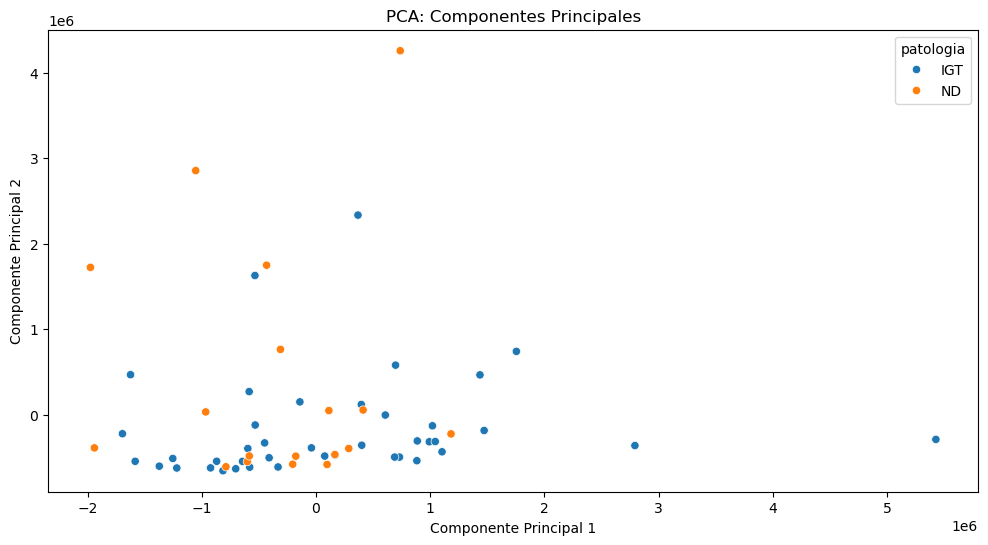

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

x = normalized.iloc[:, 1:49240].values  
y = normalized.loc[:, ["patologia"]].values

pca = PCA(n_components=2)
components = pca.fit_transform(x)

# Crear DataFrame para los componentes principales
pca_df = pd.DataFrame(data=components, columns=['PC1', 'PC2'])

# Concatenar con la columna y
pcaDF = pd.concat([pca_df, pd.DataFrame(y, columns=["patologia"])], axis=1)


# Graficar los resultados
plt.figure(figsize=(12, 6))
scatter=sns.scatterplot(data=pcaDF, x='PC1', y='PC2', hue="patologia")



plt.title('PCA: Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


#### PCA sense valors normalitzat:

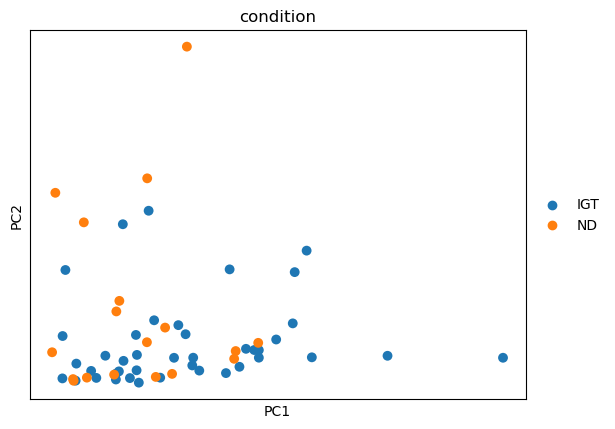

In [23]:
import scanpy as sc

#PCA
sc.tl.pca(dds)
sc.pl.pca(dds, color='condition',size=200)

## ClusterMap:

In [16]:
import numpy as np
import seaborn as sns

dds.layers['normed_counts']

array([[5.64582749e+02, 0.00000000e+00, 6.67702886e+02, ...,
        1.28900171e+00, 0.00000000e+00, 6.44500855e+00],
       [1.21134259e+02, 0.00000000e+00, 5.85140064e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.78684169e+02, 8.44240156e-01, 7.53062220e+02, ...,
        3.37696063e+00, 0.00000000e+00, 5.06544094e+00],
       ...,
       [4.89142515e+02, 0.00000000e+00, 9.53339847e+02, ...,
        0.00000000e+00, 0.00000000e+00, 4.33829282e+00],
       [3.69205853e+02, 0.00000000e+00, 8.28042066e+02, ...,
        5.93578542e-01, 0.00000000e+00, 7.12294250e+00],
       [3.59397780e+02, 0.00000000e+00, 8.11726911e+02, ...,
        0.00000000e+00, 0.00000000e+00, 2.27586984e+01]])

In [17]:
dds.layers['log2']=np.log2(dds.layers['normed_counts'] +1)
dds

AnnData object with n_obs × n_vars = 59 × 49239
    obs: 'condition'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', 'replaceable'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'replace_cooks', 'log2'

### Clustermap de Valors normalitzats transformats a log2:

In [37]:
grapher=pd.DataFrame(dds.layers['log2'].T,
                    index=dds.var_names, columns=dds.obs_names) #dataframe con los valores filtrados de mayor expression i con los valores transformados a log +1.
grapher

Sample,IGT_counts,IGT_counts.1,IGT_counts.2,IGT_counts.3,IGT_counts.4,IGT_counts.5,IGT_counts.6,IGT_counts.7,IGT_counts.8,IGT_counts.9,...,ND_counts.8,ND_counts.9,ND_counts.10,ND_counts.11,ND_counts.12,ND_counts.13,ND_counts.14,ND_counts.15,ND_counts.16,ND_counts.17
ENSG00000000003,9.143594,6.932324,8.905941,8.233972,7.370581,6.611131,8.513823,8.227440,8.592124,7.558492,...,7.388082,6.722946,7.114151,7.804748,8.506253,9.441254,8.154737,8.937057,8.532184,8.493446
ENSG00000000005,0.000000,0.000000,0.883027,2.836299,1.484231,0.000000,0.000000,1.369989,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.271010,0.000000,3.681754,0.000000,0.000000,0.000000,0.000000
ENSG00000000419,9.385222,9.195102,9.558540,8.938385,9.091957,9.200637,9.320089,9.741363,9.466332,9.156297,...,8.934192,8.990921,9.507781,9.491183,9.621489,9.756202,9.354628,9.898359,9.695301,9.666627
ENSG00000000457,8.330744,8.309162,7.916527,8.271324,7.547357,8.076095,7.896726,8.781222,8.085906,7.429444,...,8.054731,7.817993,8.134378,8.262004,8.571281,7.934024,8.281378,8.487475,8.463492,7.762931
ENSG00000000460,5.818316,5.081083,5.221194,5.647742,5.681873,5.824177,5.738236,6.008708,5.157217,5.368928,...,6.396669,6.722946,4.675848,5.863910,6.385103,5.886976,5.735894,6.244802,5.651540,5.679728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000285483,1.839155,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.369989,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.271010,1.164670,0.000000,0.787685,1.664094,0.000000,0.000000
ENSG00000285486,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.884370,4.711653,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000285492,1.194719,0.000000,2.129929,3.527182,0.000000,0.000000,1.649833,1.369989,0.000000,0.000000,...,2.258296,0.000000,0.000000,1.641527,0.000000,0.000000,1.668530,0.000000,0.672270,0.000000
ENSG00000285498,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.258296,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


C:\Users\NOE\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1400x1000 with 0 Axes>

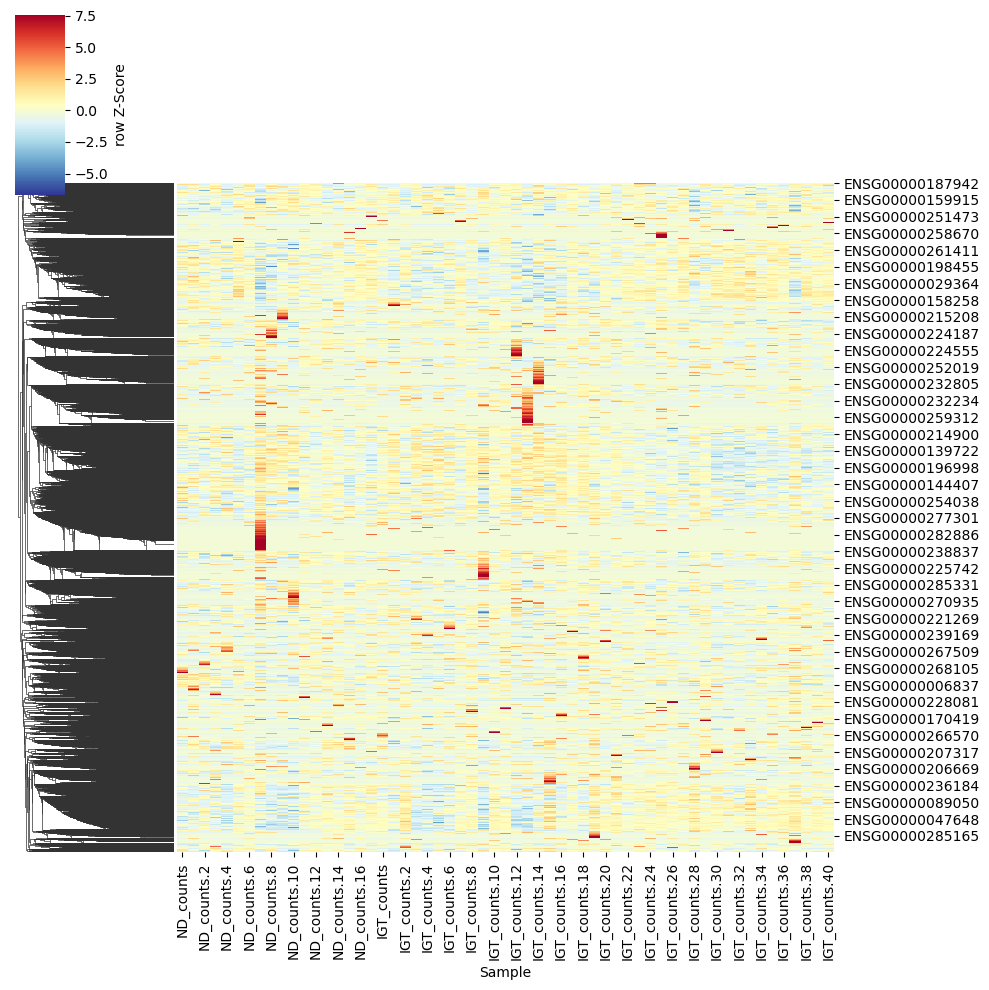

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reorganizar las muestras
nd_samples = [col for col in grapher.columns if "ND" in col]
IGT_samples = [col for col in grapher.columns if "IGT" in col]

ordered_columns = nd_samples + IGT_samples

grapher_ordered = grapher[ordered_columns]

# Crear el clustermap utilizando seaborn
plt.figure(figsize=(14, 10))
sns.clustermap(grapher_ordered, z_score=0, cmap="RdYlBu_r", col_cluster=False, cbar_kws={'label':'row Z-Score'})

plt.show()


In [40]:
grapher_ordered

Sample,ND_counts,ND_counts.1,ND_counts.2,ND_counts.3,ND_counts.4,ND_counts.5,ND_counts.6,ND_counts.7,ND_counts.8,ND_counts.9,...,IGT_counts.31,IGT_counts.32,IGT_counts.33,IGT_counts.34,IGT_counts.35,IGT_counts.36,IGT_counts.37,IGT_counts.38,IGT_counts.39,IGT_counts.40
ENSG00000000003,7.735677,8.021522,8.793703,7.756714,9.346234,8.862191,8.725127,7.940647,7.388082,6.722946,...,9.118224,9.182022,9.488052,7.522010,8.747182,8.441822,8.095835,8.948244,9.057148,8.772531
ENSG00000000005,0.000000,0.000000,0.000000,0.000000,5.134154,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.062173,5.081340,3.356561,1.210659,0.000000
ENSG00000000419,9.621152,9.605202,9.345018,9.426400,9.810291,10.467661,9.633290,8.844014,8.934192,8.990921,...,9.808732,10.052396,9.829320,9.660973,10.286567,9.679334,9.363540,10.143322,9.911640,9.875770
ENSG00000000457,8.037785,8.230618,7.505627,8.242152,8.259464,8.258205,8.387858,8.435214,8.054731,7.817993,...,7.698196,7.942806,7.810142,7.794219,8.319605,8.156161,8.056810,8.289788,8.228980,8.261125
ENSG00000000460,7.079826,6.808919,5.164080,6.680902,6.242897,4.990101,6.635988,6.720242,6.396669,6.722946,...,4.633302,4.181373,5.348412,5.498058,6.358247,5.556251,5.862793,5.838649,5.534434,5.750344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000285483,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.517501,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.003176,0.000000,1.371879,0.000000,0.000000,0.000000,0.000000
ENSG00000285486,1.089783,0.000000,0.000000,1.590675,0.000000,0.000000,0.000000,4.162605,0.000000,0.000000,...,0.822375,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000285492,0.000000,2.913906,0.000000,2.592100,0.000000,2.175636,2.053318,3.452386,2.258296,0.000000,...,0.000000,2.009098,0.000000,0.000000,0.000000,0.000000,3.784225,2.676206,0.000000,0.000000
ENSG00000285498,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.258296,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Clustermap dels gens més significatius:

In [33]:
dds_sigs=dds[:, sigs.index]
#dds_sigs.obs

In [47]:
grapher1=pd.DataFrame(dds_sigs.layers['log2'].T,
                    index=dds_sigs.var_names, columns=dds_sigs.obs_names) #dataframe con los valores filtrados de mayor expression i con los valores transformados a log +1.
grapher1

Sample,IGT_counts,IGT_counts.1,IGT_counts.2,IGT_counts.3,IGT_counts.4,IGT_counts.5,IGT_counts.6,IGT_counts.7,IGT_counts.8,IGT_counts.9,...,ND_counts.8,ND_counts.9,ND_counts.10,ND_counts.11,ND_counts.12,ND_counts.13,ND_counts.14,ND_counts.15,ND_counts.16,ND_counts.17
ENSG00000009790,4.150318,4.559758,6.133968,3.731586,0.000000,0.000000,2.665604,4.535158,5.407759,2.008754,...,3.626765,0.000000,2.563674,4.939199,3.677765,3.887996,4.022575,3.566295,3.022002,3.928293
ENSG00000010610,7.352390,7.125008,8.023376,1.461956,6.018315,3.495069,5.520341,7.492410,7.481002,4.534717,...,4.012305,4.282812,5.332598,6.526040,6.982123,7.098834,6.692212,6.419483,6.768598,7.538495
ENSG00000011028,5.356110,4.428359,6.688643,0.000000,0.000000,0.892398,3.408831,4.583637,5.318826,2.008754,...,2.258296,2.027686,0.000000,3.011947,4.046381,4.934600,4.723589,4.197957,4.233225,4.733546
ENSG00000019582,10.952884,10.926544,12.862155,8.484239,9.307847,7.895930,9.992478,11.812757,11.716189,8.216191,...,8.637884,10.006868,9.040554,9.844939,11.400120,11.071852,10.493111,11.195226,10.725110,10.462595
ENSG00000026025,10.506797,9.159287,12.068944,7.463374,9.028811,6.708839,9.677322,10.295613,10.649821,5.965669,...,7.388082,7.091807,7.212992,9.084815,9.878138,10.075162,10.395360,9.880210,10.026150,9.858629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000240065,6.805475,6.285256,7.767984,6.273040,4.552808,4.870687,6.284792,7.280835,7.143935,4.596138,...,5.649484,5.245269,5.905577,5.846298,6.931652,6.579869,6.661488,7.255881,7.522167,6.209794
ENSG00000247809,5.309978,2.839832,6.866177,4.772004,3.943119,2.617663,0.000000,5.426070,6.376046,4.098439,...,3.626765,0.000000,0.000000,4.939199,5.280789,4.440104,5.591249,5.243193,3.930348,4.319443
ENSG00000249751,5.262322,4.123085,7.158179,0.908742,1.886168,2.145689,0.000000,5.819260,6.083866,3.010207,...,2.258296,0.000000,0.000000,4.425790,5.732172,4.565558,5.134886,4.920459,5.097628,4.319443
ENSG00000253755,0.000000,2.028458,5.375857,0.000000,0.000000,0.000000,1.649833,0.000000,3.861492,1.005842,...,0.000000,2.027686,0.000000,1.641527,0.696804,0.000000,0.787685,1.059752,1.129057,1.942923


<Figure size 1400x1000 with 0 Axes>

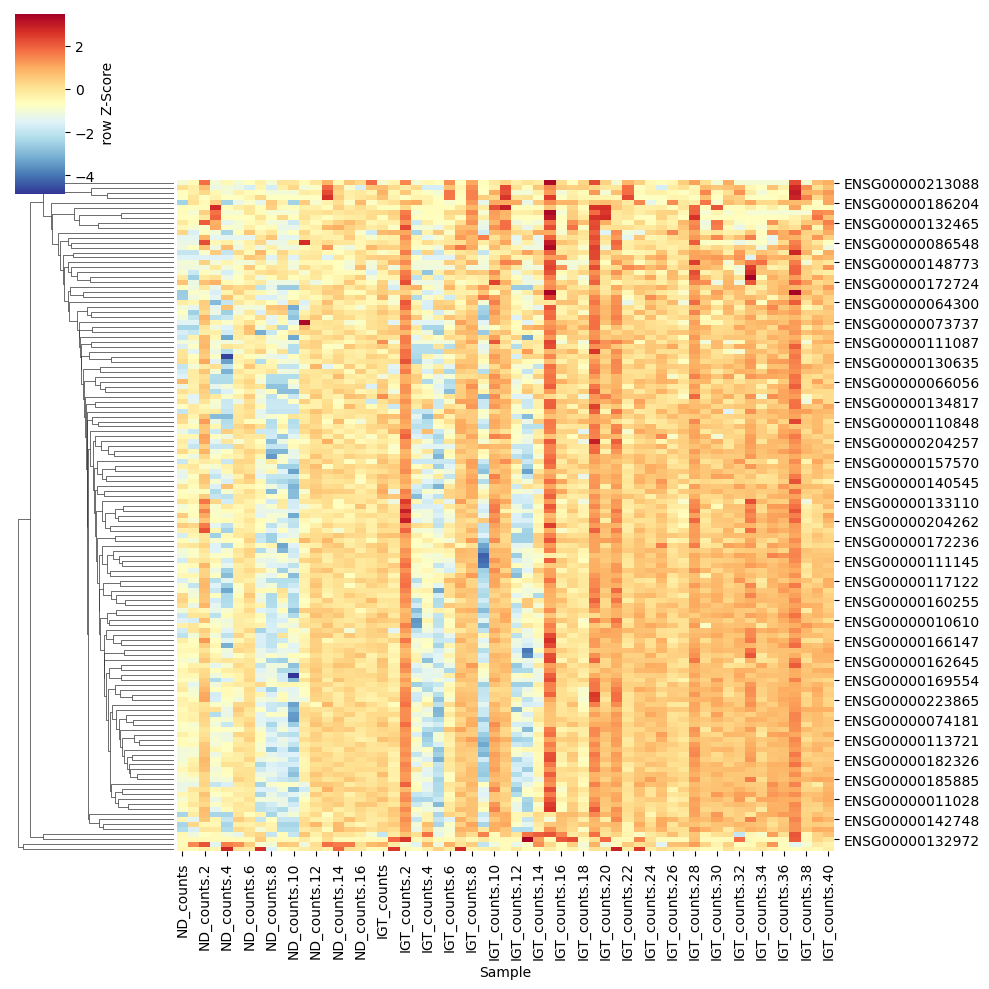

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reorganizar las muestras
nd_samples1 = [col for col in grapher1.columns if "ND" in col]
igt_samples1 = [col for col in grapher1.columns if "IGT" in col]

ordered_columns1 = nd_samples1 + igt_samples1

grapher_ordered1 = grapher1[ordered_columns1]

# Crear el clustermap utilizando seaborn
plt.figure(figsize=(14, 10))
sns.clustermap(grapher_ordered1, z_score=0, cmap="RdYlBu_r", col_cluster=False, cbar_kws={'label':' row Z-Score'})

plt.show()


### VolcanoPlot:

Amb la implementació del Volcano Plot i establint límits en el log2FoldChange i p-valor ajustat, visualitzarem els gens diferencialment regulats.

In [25]:
from sanbomics.plots import volcano
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
ENSG00000000003,375.858358,0.207009,0.191833,1.079108,0.280540,0.732487,TSPAN6
ENSG00000000005,1.135940,0.609883,1.085685,0.561749,0.574287,NaN,TNMD
ENSG00000000419,760.691720,-0.018704,0.106511,-0.175606,0.860604,0.973310,DPM1
ENSG00000000457,278.923873,-0.102330,0.088957,-1.150334,0.250006,0.706371,SCYL3
ENSG00000000460,59.355734,-0.482489,0.162198,-2.974696,0.002933,0.103487,C1orf112
...,...,...,...,...,...,...,...
ENSG00000285483,0.416860,-0.908301,1.201300,-0.756098,0.449590,NaN,AL590381.1
ENSG00000285486,0.405219,0.273287,1.231707,0.221876,0.824410,NaN,AC003043.2
ENSG00000285492,1.961758,-0.130679,0.776063,-0.168387,0.866279,NaN,AL356417.3
ENSG00000285498,0.064140,-0.554218,3.282275,-0.168852,0.865913,NaN,NaN


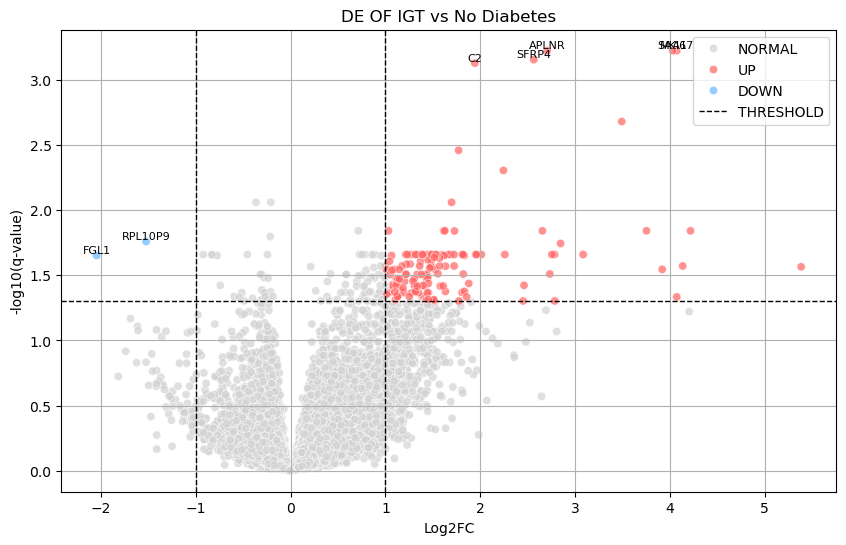

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Datos
t_results = pd.DataFrame({
    'gen': res['Symbol'],
    'p_value': res['pvalue'],
    'q_value': res['padj'],
    'LogFC': res['log2FoldChange']
})

t_results['sign'] = 'NORMAL'
for idx, row in t_results.iterrows():
    if row['q_value'] < 0.05 and row['LogFC'] > 1:
        t_results.loc[idx, 'sign'] = 'UP'
    elif row['q_value'] < 0.05 and row['LogFC'] < -1:
        t_results.loc[idx, 'sign'] = 'DOWN'

t_sign = t_results[t_results['sign'] != 'NORMAL']

# Crear el Volcano Plot
plt.figure(figsize=(10, 6))
colors = {"NORMAL": "#D2D2D2", "UP": "#FF6462", "DOWN": "#62B8FF"}

sns.scatterplot(x=t_results['LogFC'], y=-np.log10(t_results['q_value']), hue=t_results['sign'], palette=colors, alpha=0.7)
plt.axhline(-np.log10(0.05), color='k', linestyle='--', linewidth=1, label='THRESHOLD')
plt.axvline(1, color='k', linestyle='--', linewidth=1)
plt.axvline(-1, color='k', linestyle='--', linewidth=1)

# Etiquetas y título
plt.xlabel('Log2FC')
plt.ylabel('-log10(q-value)')
plt.title('DE OF IGT vs No Diabetes')
plt.legend()
plt.grid(True)

# Filtrar los genes UP más significativos
up_genes = t_results[t_results['sign'] == 'UP'].nsmallest(5, 'q_value')

for idx, row in up_genes.iterrows():
    plt.text(row['LogFC'], -np.log10(row['q_value']), row['gen'], fontsize=8, ha='center', va='bottom')

# Filtrar los genes DOWN más significativos
down_genes = t_results[t_results['sign'] == 'DOWN'].nsmallest(5, 'q_value')

for idx, row in down_genes.iterrows():
    plt.text(row['LogFC'], -np.log10(row['q_value']), row['gen'], fontsize=8, ha='center', va='bottom')

plt.show()


In [21]:
print("Genes diferencialmente expresados con su q-value y dirección:")
de=t_sign[['gen', 'q_value', 'sign']]
de=de.sort_values(by='q_value', ascending=False)
de

Genes diferencialmente expresados con su q-value y dirección:


,gen,q_value,sign
ENSG00000165457,FOLR2,0.049761,UP
ENSG00000160255,ITGB2,0.049761,UP
ENSG00000167851,CD300A,0.049761,UP
ENSG00000213088,ACKR1,0.049761,UP
ENSG00000169184,MN1,0.049469,UP
...,...,...,...
ENSG00000166278,C2,0.000744,UP
ENSG00000106483,SFRP4,0.000700,UP
ENSG00000134817,APLNR,0.000597,UP
ENSG00000148773,MKI67,0.000597,UP


### Extracció dels gens down-regulated:

In [39]:
downregulated_genes = t_results[t_results['sign'] == 'DOWN']
downregulated_genes_df = pd.DataFrame(downregulated_genes)


print(downregulated_genes)

                     gen   p_value   q_value     LogFC  sign
ENSG00000104760     FGL1  0.000078  0.022307 -2.044329  DOWN
ENSG00000233913  RPL10P9  0.000020  0.017410 -1.522522  DOWN


ENSG00000104760       FGL1
ENSG00000233913    RPL10P9
Name: gen, dtype: object

In [40]:
genes_downregulated = downregulated_genes_df['gen']
genes_downregulated

ENSG00000104760       FGL1
ENSG00000233913    RPL10P9
Name: gen, dtype: object

In [41]:
genes_downregulated.to_csv('C:/Users/NOE/Desktop/TFG-Example/Islet data/Genes downregulated/IGT_down.txt', index=False, header=False)